<a href="https://colab.research.google.com/github/AloysiusChua0822/ISEPub/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

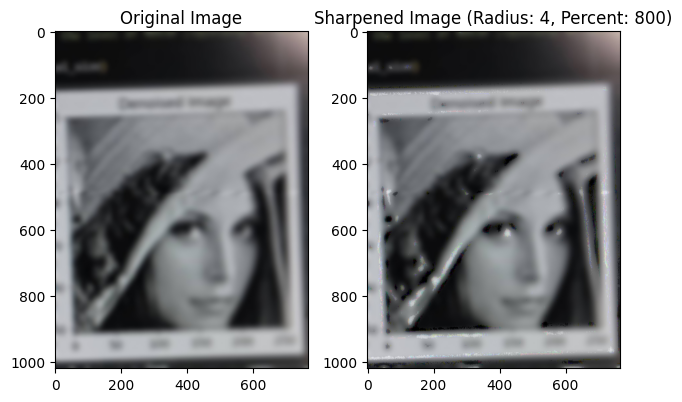

In [35]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

def sharpen_image(image_path, radius, percent):
    original_image = Image.open(image_path)

    # Apply unsharp mask filter with specified radius and percent
    sharpened_image = original_image.filter(ImageFilter.UnsharpMask(radius=radius, percent=percent))

    # Create a subplot with 1 row and 2 columns
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(sharpened_image)
    plt.title(f'Sharpened Image (Radius: {radius}, Percent: {percent})')

    # Adjust layout for better visualization
    plt.tight_layout()

    # Display the images
    plt.show()

image_path = 'blurred_image.jpg'
radius = 4  # Adjust this value to control the sharpness
percent = 800  # Adjust this value to control the strength of the sharpening effect
sharpen_image(image_path, radius, percent)

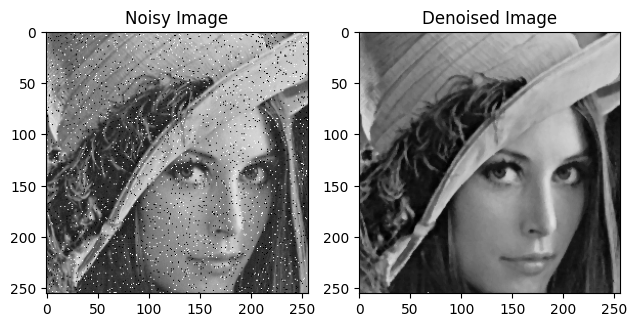

In [17]:
import cv2
import matplotlib.pyplot as plt

def remove_salt_and_pepper_noise(image_path, kernel_size):
    # Read the image
    noisy_image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY)

    # Apply median filter to remove salt and pepper noise
    denoised_image = cv2.medianBlur(gray_image, kernel_size)

    # Display the images side by side
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Noisy Image')

    plt.subplot(1, 2, 2)
    plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image')

    # Adjust layout for better visualization
    plt.tight_layout()

    # Display the images
    plt.show()

image_path = 'saltandpepper.png'
kernel_size = 3  # Adjust this value based on the level of noise (typically an odd number)

remove_salt_and_pepper_noise(image_path, kernel_size)

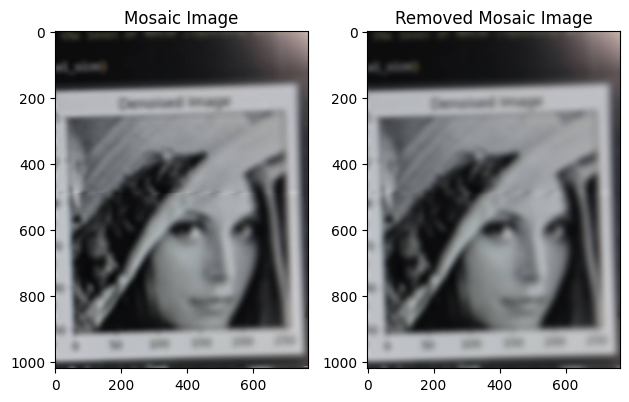

In [31]:
import cv2
import matplotlib.pyplot as plt

def remove_mosaic(image_path, block_size):
    # Read the image
    mosaic_image = cv2.imread(image_path)

    # Apply a blurring filter to reduce the mosaic effect
    blurred_image = cv2.GaussianBlur(mosaic_image, (block_size, block_size), 0)

    # Display the images side by side
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(mosaic_image, cv2.COLOR_BGR2RGB))
    plt.title('Mosaic Image')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
    plt.title('Removed Mosaic Image')

    # Adjust layout for better visualization
    plt.tight_layout()

    # Display the images
    plt.show()

    cv2.imwrite('blurred_image.jpg',blurred_image)

image_path = 'mosaic2.jpg'
block_size = 25  # Adjust this value based on the mosaic block size

remove_mosaic(image_path, block_size)

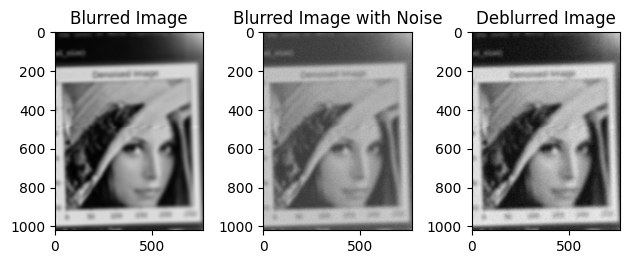

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def deblur_image(image_path, kernel_size, snr):
    # Read the blurred image
    blurred_image = cv2.imread(image_path)

    # Convert the image to grayscale
    blurred_image_gray = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)

    # Create a kernel (you may need to adjust the kernel size based on your specific case)
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)

    # Apply convolution to simulate blurring
    blurred = cv2.filter2D(blurred_image_gray, -1, kernel)

    # Add simulated noise to the blurred image
    noise = np.random.normal(0, snr, blurred_image_gray.shape)
    blurred_image_with_noise = blurred + noise

    # Perform Wiener deconvolution
    psf = np.ones_like(kernel)
    deblurred_image = cv2.filter2D(blurred_image_with_noise, -1, kernel / (np.abs(psf)**2 + 1/snr))

    # Display the images
    plt.subplot(1, 3, 1)
    plt.imshow(blurred_image_gray, cmap='gray')
    plt.title('Blurred Image')

    plt.subplot(1, 3, 2)
    plt.imshow(blurred_image_with_noise, cmap='gray')
    plt.title('Blurred Image with Noise')

    plt.subplot(1, 3, 3)
    plt.imshow(deblurred_image, cmap='gray')
    plt.title('Deblurred Image')

    # Adjust layout for better visualization
    plt.tight_layout()

    plt.show()

# Specify the path to the blurred image
image_path = 'mosaic2.jpg'

# Set the kernel size and signal-to-noise ratio (SNR)
kernel_size = 5  # Adjust this based on the blur characteristics
snr = 20  # Adjust this based on the amount of noise

# Deblur the image using Wiener deconvolution
deblur_image(image_path, kernel_size, snr)
